<a href="https://colab.research.google.com/github/biancamotac/Livraria-O-Cantinho-do-Leitor-/blob/main/Livraria_%22O_Cantinho_do_Leitor%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving Vendas(Planilha1).csv to Vendas(Planilha1).csv
Saving Clientes(Planilha1).csv to Clientes(Planilha1).csv
Saving Funcionarios(Planilha1).csv to Funcionarios(Planilha1).csv
Saving Livraria(Planilha1).csv to Livraria(Planilha1).csv
Saving Fornecedores(Planilha1).csv to Fornecedores(Planilha1).csv


In [4]:
df_livraria = pd.read_csv("Livraria(Planilha1).csv", encoding= "utf-8")
df_clientes = pd.read_csv("Clientes(Planilha1).csv", encoding= "utf-8")
df_funcionarios = pd.read_csv("Funcionarios(Planilha1).csv", encoding= "utf-8")
df_vendas = pd.read_csv("Vendas(Planilha1).csv", encoding= "utf-8")
df_fornecedores = pd.read_csv("Fornecedores(Planilha1).csv", encoding= "utf-8")

In [ ]:
print("Livros Disponíveis:")
print(df_livraria.head())

print("Clientes: ")
print(df_clientes.head(10))

print("Funcionários: ")
print(df_funcionarios.head())

print("Vendas: ")
print(df_vendas.head(10))

print("Fornecedores: ")
print(df_fornecedores.head())

Livros Disponíveis:
   ID_Livro                             Titulo                    Autor  \
0         1  Percy Jackson e o Ladrão de Raios             Rick Riordan   
1         2                           Carmilla  Joseph Sheridan Le Fanu   
2         3                     Jantar Secreto           Raphael Montes   
3         4                     Sombra e Ossos            Leigh Bardugo   
4         5                  A Rainha Vermelha         Victoria Aveyard   

           Categoria  Preco (R$)  Quantidade_Estoque               Editora  \
0  Fantasia/Aventura        49.9                  30            Intrínseca   
1    Terror/Vampiros        38.5                  18        DarkSide Books   
2    Suspense/Terror        54.9                  22  Companhia das Letras   
3        Fantasia/YA        59.9                  25               Planeta   
4  Distopia/Fantasia        47.0                  28              Seguinte   

  Data_Lancamento  Avaliacao  
0       6/15/2008        4.9 

📖 1 – Vendas por Cliente

Faça um join entre as tabelas Clientes e Vendas e exiba o total de compras realizadas por cada cliente.

In [ ]:
df1 = df_vendas.merge(df_clientes, on="ID_Cliente")
resultado1 = df1.groupby("Nome")["ID_Venda"].sum().reset_index(name="Total_Compras")
print(resultado1)

                 Nome  Total_Compras
0        Bianca Souza              2
1        Camila Rocha              3
2      Carlos Almeida              4
3   Fernanda Carvalho              7
4        Gabriel Lima              9
5  João Pedro Ribeiro              5
6     Lucas Fernandes              6
7      Marina Tavares              1
8     Patrícia Mendes             10
9        Rafael Gomes              8


📖2 – Média de Valor das Vendas por Funcionário

Relacione as tabelas Funcionarios e Vendas, calcule a média do valor das vendas realizadas por cada funcionário.

In [ ]:
df2 = df_vendas.merge(df_livraria, on="ID_Livro")
df2["Valor_Venda"] = df2["Quantidade"] * df2["Preco (R$)"]

resultado2 = df2.groupby("Vendedor")["Valor_Venda"].mean().reset_index(name="Media_Vendas")

print(resultado2)

  Vendedor  Media_Vendas
0      Ana         72.60
1     João         87.70
2    Pedro         67.55


📖 3 – Média salarial dos funcionários
Carregue a tabela Funcionarios e:
Calcule a média salarial e mostre o resultado arredondado para duas casas decimais.
Crie um gráfico de barras mostrando o salário de cada funcionário, destacando a linha da média salarial no gráfico.

Média salarial: R$3350.00


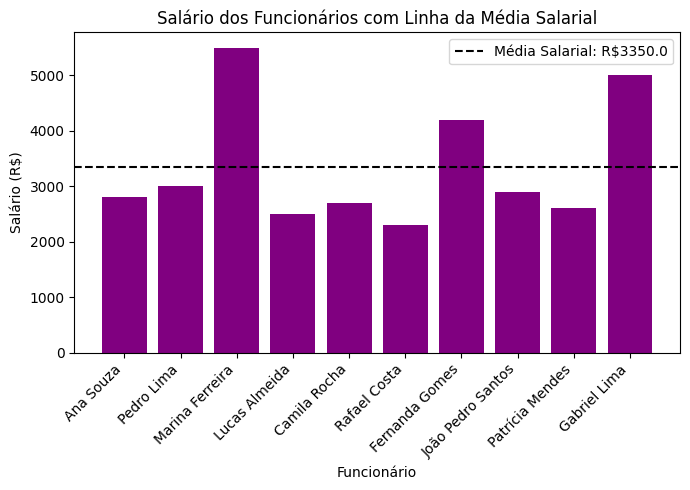

In [7]:
import matplotlib.pyplot as plt

media_salarial = round(df_funcionarios["Salario_R$"].mean(), 2)
print(f"Média salarial: R${media_salarial:.2f}")

plt.figure(figsize=(7, 5))
plt.bar(df_funcionarios["Nome"], df_funcionarios["Salario_R$"], color ="purple")
plt.axhline(y=media_salarial, color = "black", linestyle='--', label=f'Média Salarial: R${media_salarial}')
plt.xlabel("Funcionário")
plt.ylabel("Salário (R$)")
plt.title("Salário dos Funcionários com Linha da Média Salarial")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

📖 4 - Moda da forma de pagamento das vendas
Carregue a tabela Vendas e:
Descubra qual é a forma de pagamento mais utilizada (moda).
Exiba o resultado.
Faça um gráfico de barras mostrando a quantidade de vendas por forma de pagamento.


Forma de pagamento mais utilizada: Pix
Forma_Pagamento
Pix                  4
Cartão de Crédito    3
Cartão de Débito     2
Dinheiro             1
Name: count, dtype: int64


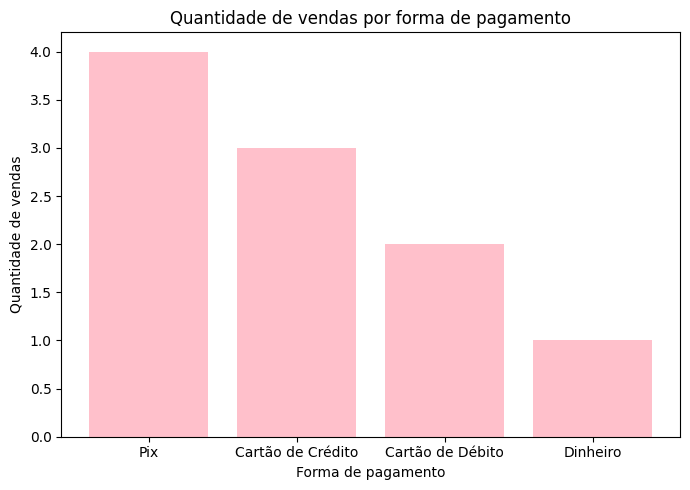

In [6]:
import matplotlib.pyplot as plt
pagamento_moda = df_vendas["Forma_Pagamento"].mode()
print(f"Forma de pagamento mais utilizada: {pagamento_moda[0]}")

quantidade = df_vendas["Forma_Pagamento"].value_counts()
print(quantidade)

plt.figure(figsize=(7, 5))
plt.bar(quantidade.index, quantidade.values, color='pink')
plt.title("Quantidade de vendas por forma de pagamento")
plt.ylabel("Quantidade de vendas")
plt.xlabel("Forma de pagamento")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format

📖 5 - Identificar os Fornecedores com Melhor Desempenho: Descubra quais fornecedores estão associados aos livros com as maiores avaliações.




In [18]:
avaliacao_por_editora = df_livraria.groupby('Editora')['Avaliacao'].mean()
avaliacao_por_editora.sort_values(ascending=False)
print("Média de Avaliação de Livros por Editora:")
print(avaliacao_por_editora)

Média de Avaliação de Livros por Editora:
Editora
Companhia das Letras   4.60
DarkSide Books         4.70
Galera Record          4.73
Intrínseca             4.85
Planeta                4.80
Record                 4.80
Seguinte               4.70
Name: Avaliacao, dtype: float64


📖 6 - Livro mais vendido.

In [24]:
livro_mais_vendido = df_vendas.merge(df_livraria, on="ID_Livro").groupby("Titulo")["Quantidade"].sum().idxmax()
quantidade_vendas = df_vendas.loc[df_vendas["Quantidade"].idxmax(), "ID_Livro"]
print(f"Livro mais vendido: {livro_mais_vendido}")
print(f"Quantidade vendida: {quantidade_vendas}")


Livro mais vendido: Carmilla
Quantidade vendida: 2


📖 7 - Distribuição de Clientes por Status de Fidelidade: Analise a sua base de clientes para entender a proporção de cada nível de fidelidade.






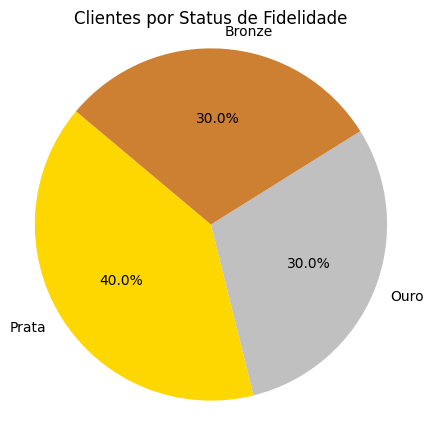

In [34]:
import matplotlib.pyplot as plt

status_counts = df_clientes['Status_Fidelidade'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#FFD700', '#C0C0C0', '#CD7F32'])
plt.title('Clientes por Status de Fidelidade')
plt.axis('equal')
plt.show()


📖 8 - Calcular o gasto médio de cada cliente somando o valor total de suas compras e relacionando com seus dados cadastrais

In [38]:
import pandas as pd

df_vendas_livros = df_vendas.merge(
    df_livraria,
    on="ID_Livro",
    how="left"
)
df_vendas_livros["Valor_Total"] = df_vendas_livros["Preco (R$)"] * df_vendas_livros["Quantidade"]

df_completo = df_vendas_livros.merge(
    df_clientes,
    on="ID_Cliente",
    how="left"
)

ticket_medio = (
    df_completo.groupby(["ID_Cliente", "Nome", "Cidade", "Status_Fidelidade"])
    .agg(
        Valor_Total=("Valor_Total", "sum"),
        Num_Vendas=("ID_Venda", "nunique")
    )
    .assign(Ticket_Medio=lambda x: x["Valor_Total"] / x["Num_Vendas"])
    .reset_index()
    .sort_values(by="Ticket_Medio", ascending=False)
)

print(ticket_medio)


   ID_Cliente                Nome          Cidade Status_Fidelidade  \
7           8  João Pedro Ribeiro   Florianópolis             Prata   
0           1        Bianca Souza       São Paulo              Ouro   
9          10        Gabriel Lima          Manaus            Bronze   
6           7   Fernanda Carvalho        Salvador              Ouro   
1           2      Carlos Almeida  Belo Horizonte             Prata   
4           5        Camila Rocha    Porto Alegre              Ouro   
8           9     Patrícia Mendes        Brasília             Prata   
3           4        Rafael Gomes        Curitiba             Prata   
2           3      Marina Tavares  Rio de Janeiro            Bronze   
5           6     Lucas Fernandes          Recife            Bronze   

   Valor_Total  Num_Vendas  Ticket_Medio  
7       123.60           1        123.60  
0       116.80           1        116.80  
9       115.50           1        115.50  
6        62.00           1         62.00  
1  

📖 9 - Listar os clientes e os fornecedores relacionados através dos livros que compraram

Tabela Clientes ↔ Fornecedores:
   ID_Cliente                Nome        Cidade_x                 Titulo  \
0           1        Bianca Souza       São Paulo         Trono de Vidro   
1           2      Carlos Almeida  Belo Horizonte         Sombra e Ossos   
2           5        Camila Rocha    Porto Alegre         Jantar Secreto   
3           7   Fernanda Carvalho        Salvador  A Paciente Silenciosa   
4           8  João Pedro Ribeiro   Florianópolis                 Verity   

        Nome_Fornecedor        Cidade_y  
0         Galera Record  Belo Horizonte  
1               Planeta       São Paulo  
2  Companhia das Letras  Rio de Janeiro  
3                Record       São Paulo  
4         Galera Record  Belo Horizonte  

Quantidade de clientes por fornecedor:
        Nome_Fornecedor  Qtd_Clientes
0  Companhia das Letras             1
1        DarkSide Books             1
2         Galera Record             3
3               Planeta             1
4                Record      

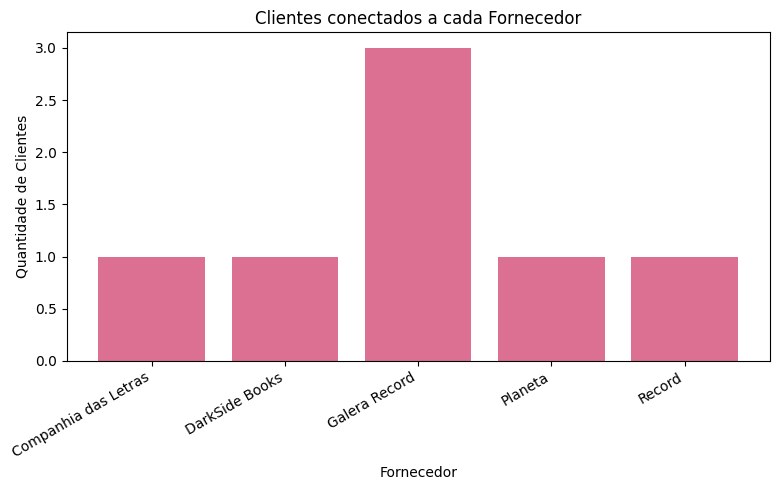

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df_clientes_vendas = df_clientes.merge(df_vendas, on="ID_Cliente", how="inner")
df_clientes_livros = df_clientes_vendas.merge(df_livraria, on="ID_Livro", how="inner")
df_clientes_fornecedores = df_clientes_livros.merge(
    df_fornecedores,
    left_on="Editora",
    right_on="Nome_Fornecedor",
    how="inner"
)
resultado = df_clientes_fornecedores[[
    "ID_Cliente", "Nome", "Cidade_x", "Titulo", "Nome_Fornecedor", "Cidade_y"
]]

print("Tabela Clientes ↔ Fornecedores:")
print(resultado.head())

clientes_por_fornecedor = (
    resultado.groupby("Nome_Fornecedor")["ID_Cliente"]
    .nunique()
    .reset_index(name="Qtd_Clientes")
)

print("\nQuantidade de clientes por fornecedor:")
print(clientes_por_fornecedor)

plt.figure(figsize=(8,5))
plt.bar(clientes_por_fornecedor["Nome_Fornecedor"], clientes_por_fornecedor["Qtd_Clientes"], color="#DB7093")
plt.title("Clientes conectados a cada Fornecedor")
plt.xlabel("Fornecedor")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

📖 10 - Liste os clientes que compraram livros, mostrando também qual funcionário os atendeu.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df_funcionarios["Primeiro_Nome"] = df_funcionarios["Nome"].str.split().str[0]

df_clientes_vendas = df_clientes.merge(df_vendas, on="ID_Cliente", how="inner")

df_clientes_funcionarios = df_clientes_vendas.merge(
    df_funcionarios,
    left_on="Vendedor",
    right_on="Primeiro_Nome",
    how="inner"
)

resultado = df_clientes_funcionarios[[
   "ID_Cliente", "Nome_x", "Cidade_x", "Vendedor", "Cargo", "Departamento"
]].rename(columns={"Nome_x": "Nome_Cliente", "Cidade_x": "Cidade"})

print("Clientes e os funcionários que os atenderam:")
print(resultado)

clientes_por_funcionario = (
    resultado.groupby("Vendedor")["ID_Cliente"]
    .nunique()
    .reset_index(name="Qtd_Clientes")
)

print("\nQuantidade de clientes atendidos por cada funcionário:")
print(clientes_por_funcionario)




Clientes e os funcionários que os atenderam:
   ID_Cliente        Nome_Cliente          Cidade Vendedor      Cargo  \
0           1        Bianca Souza       São Paulo    Pedro   Vendedor   
1           2      Carlos Almeida  Belo Horizonte     João   Vendedor   
2           3      Marina Tavares  Rio de Janeiro      Ana  Vendedora   
3           4        Rafael Gomes        Curitiba    Pedro   Vendedor   
4           5        Camila Rocha    Porto Alegre      Ana  Vendedora   
5           6     Lucas Fernandes          Recife    Pedro   Vendedor   
6           7   Fernanda Carvalho        Salvador      Ana  Vendedora   
7           8  João Pedro Ribeiro   Florianópolis      Ana  Vendedora   
8           9     Patrícia Mendes        Brasília    Pedro   Vendedor   
9          10        Gabriel Lima          Manaus     João   Vendedor   

  Departamento  
0    Comercial  
1    Comercial  
2    Comercial  
3    Comercial  
4    Comercial  
5    Comercial  
6    Comercial  
7    Comercial 